# **Data Preprocessing**

## 1. Missing values handling

Missing values are handled by mean(numerical) and mode(categorical)

In [181]:
#import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [182]:
#Loading data as df
df = pd.read_csv('/content/Crop Production data.csv')

In [183]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [184]:
#data description
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [185]:
#checking for missing values
df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [186]:
# Fill missing values in numerical columns with the mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values in categorical columns with the mode if available
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_val = df[col].mode().iloc[0]  # Get the mode value
    df[col] = df[col].fillna(mode_val)  # Fill missing values with the mode value
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


## 2. Handling Duplicates and Inconsistencies

Dropping duplicates and inconsistencies.

In [187]:
# Check for duplicate rows based on selected columns
duplicate_rows = df.duplicated(subset=['State_Name', 'District_Name', 'Crop_Year', 'Crop'], keep=False)

# Print duplicate rows
print("Duplicate rows based on selected columns:")
print(df[duplicate_rows])


Duplicate rows based on selected columns:
            State_Name District_Name  Crop_Year       Season          Crop  \
207     Andhra Pradesh     ANANTAPUR       1997  Kharif       Dry chillies   
208     Andhra Pradesh     ANANTAPUR       1997  Kharif          Groundnut   
209     Andhra Pradesh     ANANTAPUR       1997  Kharif         Horse-gram   
210     Andhra Pradesh     ANANTAPUR       1997  Kharif              Jowar   
211     Andhra Pradesh     ANANTAPUR       1997  Kharif              Korra   
...                ...           ...        ...          ...           ...   
246085     West Bengal       PURULIA       2014  Summer              Maize   
246086     West Bengal       PURULIA       2014  Summer               Rice   
246087     West Bengal       PURULIA       2014  Summer            Sesamum   
246089     West Bengal       PURULIA       2014  Winter               Rice   
246090     West Bengal       PURULIA       2014  Winter            Sesamum   

            Area  Pro

In [188]:
# Remove duplicate rows
df.drop_duplicates(subset=['State_Name', 'District_Name', 'Crop_Year', 'Crop'], inplace=True)
df.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

## 3. Encoding categorical values

## Using label encoding for 'season' and 'crop' variables.

In [189]:
# Selecting categorical columns for label encoding
categorical_cols = ['State_Name', 'District_Name', 'Season', 'Crop']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode each categorical column and replace the original column in the DataFrame
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df)

        State_Name  District_Name  Crop_Year  Season  Crop    Area  Production
0                0            427       2000       1     2  1254.0      2000.0
1                0            427       2000       1    74     2.0         1.0
2                0            427       2000       1    95   102.0       321.0
3                0            427       2000       4     7   176.0       641.0
4                0            427       2000       4    22   720.0       165.0
...            ...            ...        ...     ...   ...     ...         ...
246080          32            471       2014       2    87   477.0      9995.0
246081          32            471       2014       2    92  1885.0      1508.0
246082          32            471       2014       2    98    54.0        37.0
246084          32            471       2014       2   119  1622.0      3663.0
246088          32            471       2014       4   106   324.0     16250.0

[214206 rows x 7 columns]


## 4.Normalization of numerical features

Using min-max scaling normalization technique for the normalization of numerical data

In [190]:
# Selecting numerical columns for min-max normalization
numerical_cols = ['Crop_Year', 'Area', 'Production']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the normalized DataFrame
print(df)

        State_Name  District_Name  Crop_Year  Season  Crop          Area  \
0                0            427   0.166667       1     2  1.461475e-04   
1                0            427   0.166667       1    74  2.284356e-07   
2                0            427   0.166667       1    95  1.188331e-05   
3                0            427   0.166667       4     7  2.050792e-05   
4                0            427   0.166667       4    22  8.391044e-05   
...            ...            ...        ...     ...   ...           ...   
246080          32            471   0.944444       2    87  5.558910e-05   
246081          32            471   0.944444       2    92  2.196897e-04   
246082          32            471   0.944444       2    98  6.288971e-06   
246084          32            471   0.944444       2   119  1.890374e-04   
246088          32            471   0.944444       4   106  3.775714e-05   

          Production  
0       1.598977e-06  
1       7.994883e-10  
2       2.566358e-

# Exploratory data analysis

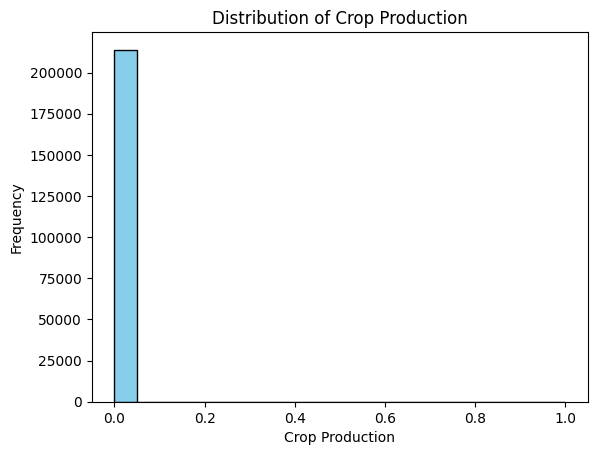

In [191]:
# Compute measures of central tendency
central_tendency = df.describe()

# Compute measures of dispersion
dispersion = df.describe(percentiles=[0.25, 0.75])

# Distributional analysis
# Histogram
plt.hist(df['Production'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Crop Production')
plt.ylabel('Frequency')
plt.title('Distribution of Crop Production')
plt.show()

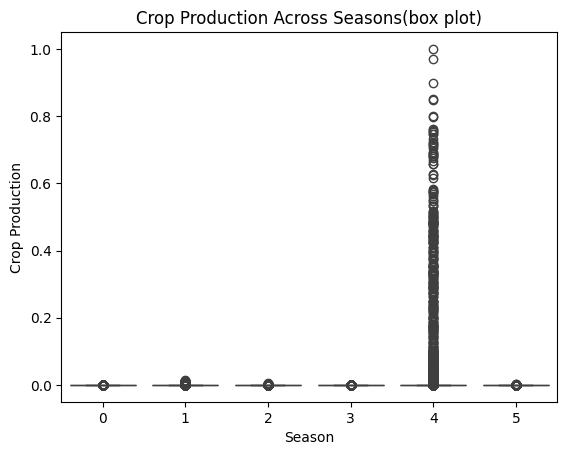

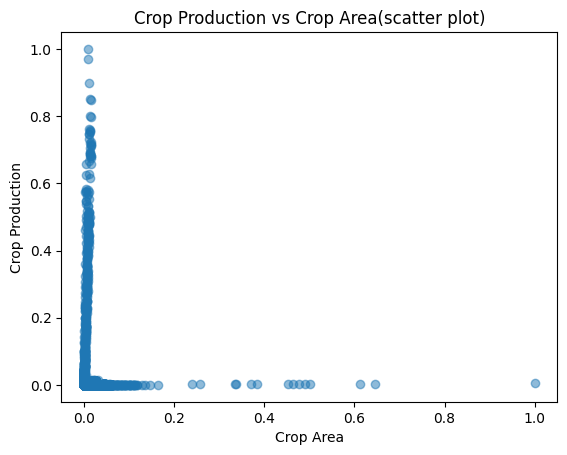

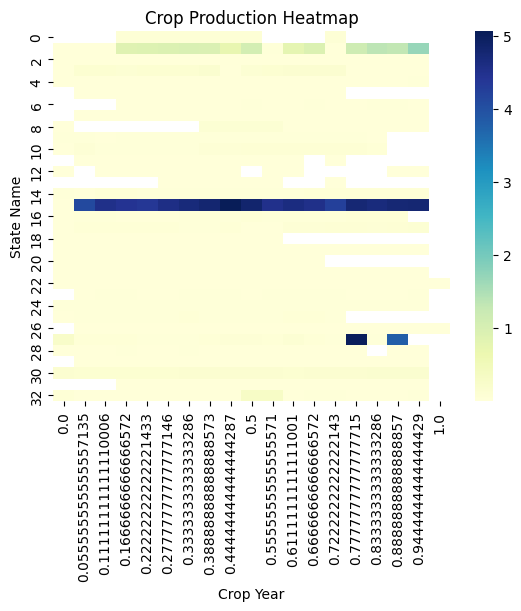

In [192]:
#visualizations
# Box plot
sns.boxplot(x='Season', y='Production', data=df)
plt.xlabel('Season')
plt.ylabel('Crop Production')
plt.title('Crop Production Across Seasons(box plot)')
plt.show()

# Scatter plot
plt.scatter(df['Area'], df['Production'], alpha=0.5)
plt.xlabel('Crop Area')
plt.ylabel('Crop Production')
plt.title('Crop Production vs Crop Area(scatter plot)')
plt.show()

# Heatmap
heatmap_data = df.pivot_table(index='State_Name', columns='Crop_Year', values='Production', aggfunc='sum')
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.xlabel('Crop Year')
plt.ylabel('State Name')
plt.title('Crop Production Heatmap')
plt.show()


In [193]:
# Temporal trends (e.g., mean crop production over years)
temporal_trends = df.groupby('Crop_Year')['Production'].mean()

# Spatial variations (e.g., mean crop production across states)
spatial_variations = df.groupby('State_Name')['Production'].mean()

# Seasonal effects (e.g., mean crop production by season)
seasonal_effects = df.groupby('Season')['Production'].mean()

print(temporal_trends)
print(spatial_variations)
print(seasonal_effects)

Crop_Year
0.000000    0.000086
0.055556    0.000478
0.111111    0.000468
0.166667    0.000489
0.222222    0.000495
0.277778    0.000408
0.333333    0.000405
0.388889    0.000528
0.444444    0.000532
0.500000    0.000561
0.555556    0.000442
0.611111    0.000492
0.666667    0.000514
0.722222    0.000425
0.777778    0.000981
0.833333    0.000581
0.888889    0.000918
0.944444    0.000779
1.000000    0.000006
Name: Production, dtype: float64
State_Name
0     0.002833
1     0.002018
2     0.000002
3     0.000120
4     0.000014
5     0.000006
6     0.000023
7     0.000006
8     0.002211
9     0.000060
10    0.000158
11    0.000013
12    0.000007
13    0.000003
14    0.000044
15    0.020645
16    0.000022
17    0.000096
18    0.000004
19    0.000003
20    0.000003
21    0.000003
22    0.000007
23    0.000456
24    0.000152
25    0.000035
26    0.000003
27    0.000751
28    0.000061
29    0.000008
30    0.000090
31    0.000029
32    0.000119
Name: Production, dtype: float64
Season
0    0.00001

## Model training and validation

In [194]:
#  X contains input features and y contains the target variable (Crop_Production)
X = df.drop(columns=['Production'])
y = df['Production']
# Data Partitioning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Validation

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)  # You can adjust the degree as needed
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
poly_pred = poly_reg.predict(X_poly_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # You can adjust alpha (regularization strength) as needed
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=1.0)  # You can adjust alpha as needed
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# Elastic Net Regression
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust alpha and l1_ratio as needed
elastic_net.fit(X_train, y_train)
elastic_net_pred = elastic_net.predict(X_test)

# Hyperparameter Tuning (Grid Search example)
param_grid = {'alpha': [0.1, 1.0, 10.0]}  # Define hyperparameters to tune
ridge_grid = GridSearchCV(Ridge(), param_grid)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

# Performance Evaluation
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

# Evaluate each model
print("Linear Regression:")
evaluate_model(y_test, linear_pred)
print("\n")
print("Polynomial Regression:")
evaluate_model(y_test, poly_pred)
print("\n")

print("Ridge Regression:")
evaluate_model(y_test, ridge_pred)
print("\n")

print("Lasso Regression:")
evaluate_model(y_test, lasso_pred)
print("\n")

print("Elastic Net Regression:")
evaluate_model(y_test, elastic_net_pred)
print("\n")

# Evaluate best Ridge model from Grid Search
print("Best Ridge Regression (Grid Search):")
best_ridge_pred = best_ridge.predict(X_test)
evaluate_model(y_test, best_ridge_pred)

Linear Regression:
Mean Absolute Error: 0.001341409495763123
Mean Squared Error: 0.0001984101816653625
R-squared: 0.005985706176883876


Polynomial Regression:
Mean Absolute Error: 0.0016460737909492768
Mean Squared Error: 0.00019467351594195956
R-squared: 0.024706011299964303


Ridge Regression:
Mean Absolute Error: 0.0013269231757612398
Mean Squared Error: 0.0001984306651174945
R-squared: 0.005883086220412004


Lasso Regression:
Mean Absolute Error: 0.0009587791443005409
Mean Squared Error: 0.0001996094703632464
R-squared: -2.26049798879302e-05


Elastic Net Regression:
Mean Absolute Error: 0.0009587791443005409
Mean Squared Error: 0.0001996094703632464
R-squared: -2.26049798879302e-05


Best Ridge Regression (Grid Search):
Mean Absolute Error: 0.0013269231757612398
Mean Squared Error: 0.0001984306651174945
R-squared: 0.005883086220412004
